In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/Ergo/Desktop/Git_Dotin/Dotin-Columbia-Castone-Team-Alpha-/Data/Clean Data/votes_v2.csv')

In [3]:
df.head()

,Unnamed: 0,id,attr,value,score,user_id,weight,created_date,created_time,created_weekday
0,0,1,psy,bf_1,1,365,0.0,2019-03-05,06:56:35.625896,Tuesday
1,1,2,psy,bf_2,1,365,0.0,2019-03-05,06:56:35.628088,Tuesday
2,2,3,psy,bf_3,1,365,0.0,2019-03-05,06:56:35.629157,Tuesday
3,3,4,psy,bf_4,1,365,0.0,2019-03-05,06:56:35.630054,Tuesday
4,4,5,psy,bf_5,1,365,0.0,2019-03-05,06:56:35.630927,Tuesday


In [4]:
df_pivot=pd.pivot_table(df, index='user_id', columns='value', values='score')

In [5]:
df_pivot.head()

value,bf_1,bf_10,bf_11,bf_12,bf_13,bf_14,bf_15,bf_16,bf_17,bf_18,...,pgi_7_Competence,pgi_7_Liking,pgi_8_Competence,pgi_8_Liking,pgi_9_Competence,pgi_9_Liking,pgi_validation_5_Competence,pgi_validation_5_Liking,pgi_validation_6_Competence,pgi_validation_6_Liking
user_id,,,,,,,,,,,,,,,,,,,,,
365,1,5,5,5,5,5,5,5,5,3,...,4,4,4,4,4,4,4,4,4,4
371,1,1,1,1,1,1,1,1,1,1,...,1,5,1,7,1,1,1,1,1,1
373,5,3,3,4,4,3,4,3,5,5,...,4,6,6,5,7,7,4,5,2,4
374,4,3,4,5,4,5,4,3,3,5,...,6,5,6,6,6,6,6,6,4,4
375,3,5,5,2,3,2,3,2,2,4,...,2,2,3,2,2,5,3,2,2,5


In [6]:
#turn pivot to df
df2 = pd.DataFrame(df_pivot.to_records())

### Normalize the Survey Question Scores

In [8]:
from sklearn import preprocessing
col='user_id'
unnormalized=df2.loc[:, df2.columns != col]

In [13]:
#normalize dataset
normalized=preprocessing.normalize(unnormalized)

In [14]:
normalized

array([[0.0202113 , 0.10105651, 0.10105651, ..., 0.08084521, 0.08084521,
        0.08084521],
       [0.02968261, 0.02968261, 0.02968261, ..., 0.02968261, 0.02968261,
        0.02968261],
       [0.08932845, 0.05359707, 0.05359707, ..., 0.08932845, 0.03573138,
        0.07146276],
       ...,
       [0.02282772, 0.09131087, 0.04565544, ..., 0.13696631, 0.09131087,
        0.09131087],
       [0.04342357, 0.05789809, 0.05789809, ..., 0.08684714, 0.05789809,
        0.05789809],
       [0.0363877 , 0.0727754 , 0.05458155, ..., 0.10916311, 0.0727754 ,
        0.0727754 ]])

In [19]:
df_normalized = pd.DataFrame(normalized,index=normalized[:,0])

### Evaluate the factorability of the dataset

In [20]:
#Bartlett Sphericity Test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_normalized)
chi_square_value, p_value

(83838.17172546322, 0.0)

In [21]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_normalized)

In [22]:
kmo_model

0.885312835531242

### Factor Analysis

In [26]:
#perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df_normalized, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

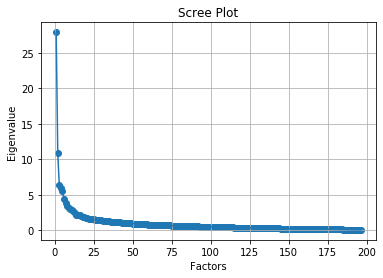

In [27]:
#scree plot
plt.scatter(range(1,df_normalized.shape[1]+1),ev)
plt.plot(range(1,df_normalized.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# factor analysis with only selected nr of factors
fa = FactorAnalyzer()
fa.fit(df, x, rotation="varimax")
# x should be nr of factors from scree plot